# Algorithm to create Figure 6 (A)

1. Initialize parameters
   1. `N_HD`: number of HD cells
   2. `N_CONJ`: number of CONJ cells
   3. `N_ENV`: number of ENV cells
   4. `k`: learning rate
   5. `total_time`: simulation time in seconds
   6. `dt`: timestep size in seconds
2. Initialize weights for connections from HD to CONJ/ENV cells
   1. CONJ cells: random/uniform distribution
   2. ENV cells: zero (no HD input)
3. Learning (for-loop): at each time step
   1. calculate firing rate of conj cell at time step
   2. calculate firing rate of hd cell at previous time step
   3. update weights
   4. normalize weights
4. Plot initial weight
5. Plot post-learning weight

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Initialize parameters (from the supplementary sheet)
N_HD = 180  # Number of HD cells
N_CONJ = 360  # Number of CONJ cells
N_ENV = 360  # Number of ENV cells
k = 0.005  # Learning rate (from the supplementary sheet)
delta_t = 0.0001  # Timestep size (from the supplementary sheet)
simulation_time = 600  # Simulation time in seconds (from the supplementary sheet)
time_steps = int(simulation_time / delta_t)  # Total number of timesteps

In [3]:
# Constants (from the supplementary sheet)
tau_CONJ_ENV = 0.001  # Time constant for CONJ/ENV cells
phi_1 = 160  # HD to CONJ strength (from the supplementary sheet)
phi_3 = 100  # VIS to CONJ/ENV strength (from the supplementary sheet)
w_tilde_CONJ_ENV = 7  # Global inhibition constant for CONJ/ENV cells

In [4]:
# Step 2: Initialize weights (from the supplementary sheet)
# CONJ cells: Randomly allocated weights
w_HD_CONJ = np.random.rand(N_CONJ, N_HD)  # Random weights for CONJ cells
# ENV cells: Zero weights
w_HD_ENV = np.zeros((N_ENV, N_HD))  # Zero weights for ENV cells

In [5]:
# Step 3: Initialize activation levels and firing rates
h_CONJ = np.zeros(N_CONJ)  # Activation levels for CONJ cells
h_ENV = np.zeros(N_ENV)  # Activation levels for ENV cells
r_CONJ = np.zeros(N_CONJ)  # Firing rates for CONJ cells
r_ENV = np.zeros(N_ENV)  # Firing rates for ENV cells

In [6]:
# Example firing rates for HD and VIS cells (replace with actual model values if available)
r_HD = np.random.rand(N_HD)  # Firing rates of HD cells (example)
r_VIS = np.random.rand(N_HD)  # Firing rates of VIS cells (example)

In [7]:
delta_t = 0.1  # Timestep size (from the supplementary sheet)
simulation_time = 600  # Simulation time in seconds (from the supplementary sheet)
time_steps = int(simulation_time / delta_t)  # Total number of timesteps

In [8]:
# Step 4: Simulate learning over time steps
for t in range(time_steps):
    print(t)
    # Step 4.1: Update activation levels for CONJ cells
    for i in range(N_CONJ):
        # Input from HD cells (with conduction delay)
        input_HD = np.sum(w_HD_CONJ[i, :] * r_HD)  # Sum over HD cells
        
        # Input from VIS cells
        input_VIS = np.sum(w_HD_CONJ[i, :] * r_VIS)  # Sum over VIS cells
        
        # Inhibition from other CONJ/ENV cells
        inhibition = (1 / N_CONJ) * w_tilde_CONJ_ENV * np.sum(r_CONJ)
        
        # Update activation level using Forward Euler method
        h_CONJ[i] += (delta_t / tau_CONJ_ENV) * (
            -h_CONJ[i]  # Exponential decay
            - inhibition  # Inhibition from other CONJ/ENV cells
            + (phi_1 / N_HD) * input_HD  # Input from HD cells
            + (phi_3 / N_HD) * input_VIS  # Input from VIS cells
        )
        
        # Calculate firing rate using hyperbolic tangent transfer function
        tanh_h_i = np.tanh(h_CONJ[i])
        if tanh_h_i < 0:
            r_CONJ[i] = 0
        else:
            r_CONJ[i] = tanh_h_i

    # Step 4.2: Update weights for CONJ cells using the learning rule
    # Learning rule: dw_ij(t)/dt = k * r_i(t) * r_j(t - Δt)
    for i in range(N_CONJ):
        for j in range(N_HD):
            w_HD_CONJ[i, j] += k * r_CONJ[i] * r_HD[j] * delta_t

    # Step 4.3: Normalize weights for CONJ cells
    # Normalization: sqrt(sum_j (w_ij(t))^2) = 1
    for i in range(N_CONJ):
        norm = np.sqrt(np.sum(w_HD_CONJ[i, :]**2))
        if norm > 0:
            w_HD_CONJ[i, :] /= norm

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153


C:\Users\sangeetha\AppData\Local\Temp\ipykernel_16928\1172145407.py:16: RuntimeWarning: overflow encountered in scalar multiply
  h_CONJ[i] += (delta_t / tau_CONJ_ENV) * (
C:\Users\sangeetha\AppData\Local\Temp\ipykernel_16928\1172145407.py:16: RuntimeWarning: invalid value encountered in scalar add
  h_CONJ[i] += (delta_t / tau_CONJ_ENV) * (


154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403


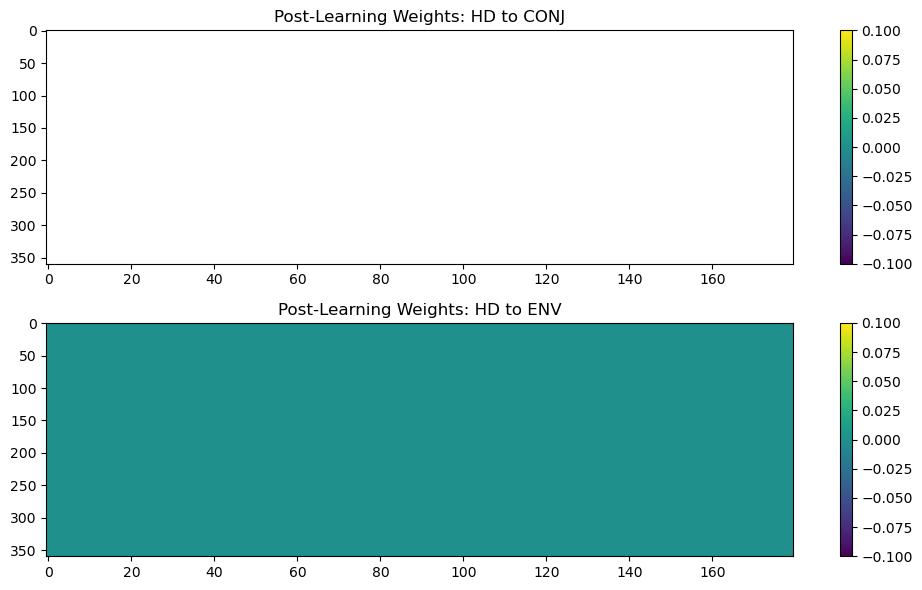

In [9]:
# Step 6: Plot post-learning weights for CONJ and ENV cells
plt.figure(figsize=(10, 6))

# Step 6.1: Plot post-learning weights for CONJ cells
plt.subplot(2, 1, 1)
plt.imshow(w_HD_CONJ, aspect='auto', cmap='viridis')  # Post-learning weights for all CONJ cells
plt.title('Post-Learning Weights: HD to CONJ')
plt.colorbar()

# Step 6.2: Plot post-learning weights for ENV cells
plt.subplot(2, 1, 2)
plt.imshow(w_HD_ENV, aspect='auto', cmap='viridis')  # Post-learning weights for all ENV cells
plt.title('Post-Learning Weights: HD to ENV')
plt.colorbar()

plt.tight_layout()